In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

## Option Hedging Simulation

E(W(t))= 0      0.000000
1      0.000825
2      0.000392
3      0.000902
4     -0.000072
         ...   
248    0.009458
249    0.008795
250    0.007413
251    0.008073
252    0.007296
Length: 253, dtype: float64
SD(W_t)= 0      0.000000
1      0.063108
2      0.088906
3      0.109037
4      0.126483
         ...   
248    0.986948
249    0.989587
250    0.992533
251    0.994430
252    0.996287
Length: 253, dtype: float64


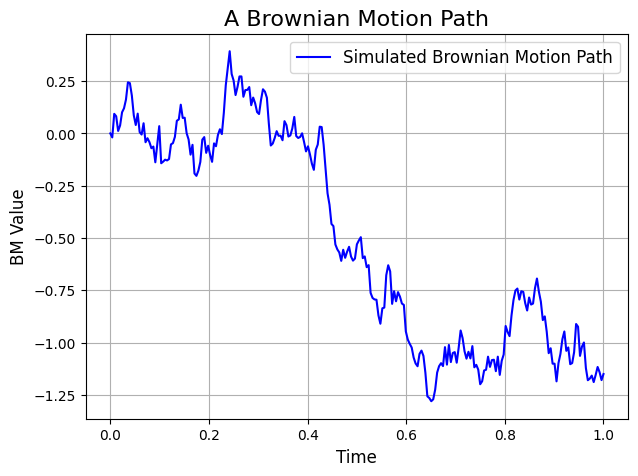

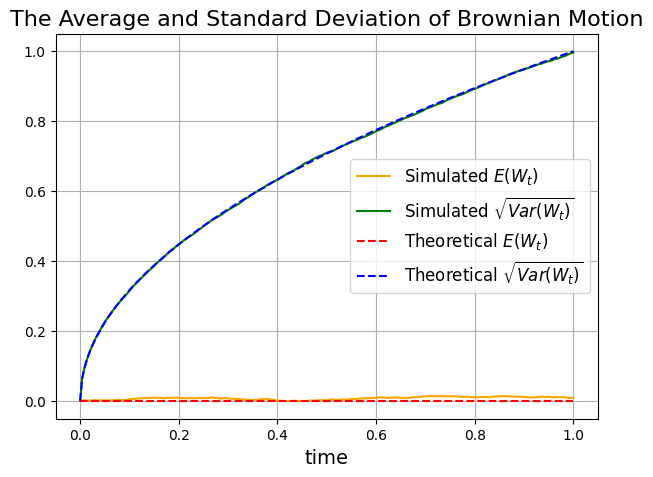

,0,1,2,3,4,5,6,7,8,9,...,243,244,245,246,247,248,249,250,251,252
0,0.0,-0.019245,0.093401,0.081874,0.011659,0.038082,0.100770,0.119998,0.161559,0.244055,...,-1.120985,-1.179224,-1.171456,-1.157136,-1.188070,-1.153998,-1.115939,-1.140804,-1.178637,-1.149676
1,0.0,-0.069310,-0.026865,-0.004076,-0.166498,-0.172469,-0.133406,-0.169040,-0.125937,-0.113067,...,-0.402883,-0.348625,-0.472365,-0.521419,-0.472585,-0.401645,-0.309032,-0.287406,-0.341973,-0.295459
2,0.0,-0.093401,-0.065293,-0.165413,-0.168986,-0.166271,-0.239892,-0.273592,-0.223012,-0.292374,...,-0.362302,-0.300809,-0.316637,-0.328130,-0.366650,-0.306670,-0.340971,-0.352602,-0.358401,-0.404587
3,0.0,-0.056198,0.022996,-0.126895,-0.094678,-0.104964,-0.107856,-0.117898,-0.141522,-0.223260,...,-1.960333,-2.048362,-1.948059,-1.891774,-1.983437,-1.849762,-1.908557,-1.986663,-1.981997,-1.932914
4,0.0,0.017193,-0.083832,-0.125139,-0.077345,0.005579,-0.070125,0.069292,-0.010233,0.005479,...,0.501281,0.496102,0.508241,0.550940,0.685960,0.638154,0.569254,0.522255,0.583362,0.600519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.082130,-0.048418,-0.103895,-0.089303,-0.104973,-0.104587,-0.242681,-0.170528,-0.249904,...,0.023627,-0.064121,-0.029679,0.017394,0.074668,0.091819,-0.057566,-0.021899,-0.064968,-0.125346
9996,0.0,-0.049040,0.090050,0.100362,0.101212,0.129279,0.128072,0.154732,0.084529,0.061068,...,-1.193112,-1.217807,-1.171179,-1.199898,-1.188045,-1.273943,-1.358385,-1.347680,-1.412180,-1.518099
9997,0.0,0.032970,-0.023339,0.064237,0.159103,0.166326,0.250619,0.318194,0.490859,0.527659,...,3.189549,3.219522,3.171703,3.216656,3.307530,3.265661,3.269305,3.317531,3.381403,3.382646
9998,0.0,0.026274,-0.008823,-0.058651,-0.030566,0.048575,0.077585,0.082133,0.106988,0.089350,...,1.534412,1.503840,1.535374,1.538094,1.531292,1.625420,1.639094,1.547710,1.534052,1.536289


In [3]:
# BM simulator
def BMGeneration(T):

    N = 252
    step = T/N

    paths = []
    for i in range(10000):
        dw = np.random.normal(0, np.sqrt(step), N)
        w = np.cumsum(dw)
        zero_w = np.insert(w, 0, [0]) # B(t_0)=0
        paths.append(zero_w)

    # for 10k paths, estimate the average E[W(t)] at each timestep, and the std dev $\sqrt{Var(W_t)}$ from the paths
    df = pd.DataFrame(paths)
    mean_row = df.mean()
    std_row = df.std()
    print("E(W(t))=", mean_row)
    print("SD(W_t)=", std_row)

    t = [i/N for i in range(0, N+1)]
    
    # Plot graph of a BM path
    fig = plt.figure(figsize=(7, 5))
    plt.title("A Brownian Motion Path",fontsize = 16)
    plt.xlabel("Time", fontsize = 12)
    plt.ylabel("BM Value", fontsize = 12)
    plt.plot(t, paths[0],'b-',label = 'Simulated Brownian Motion Path')
    plt.legend(loc='upper right', fontsize = 12)
    plt.grid()
    plt.show()

    # (c) Plot the results along with theoretical values for $E(W_{t})$ and $\sqrt{Var(W_{t})}$__.
    fig = plt.figure(figsize=(7, 5))
    plt.title("The Average and Standard Deviation of Brownian Motion",fontsize = 16)
    plt.xlabel("time", fontsize = 14)
    l1 = plt.plot(t, mean_row,color='orange',label = 'Simulated $E(W_{t})$')
    l2 = plt.plot(t, std_row,'g-',label = 'Simulated $\sqrt{Var(W_{t})}$')
    l3 = plt.plot(t, np.zeros(253),'r', linestyle = '--', label = 'Theoretical $E(W_{t})$')
    l4 = plt.plot(t,np.sqrt(t),'b',linestyle = '--', label = 'Theoretical $\sqrt{Var(W_{t})}$')
    plt.legend(loc='best', fontsize = 12)
    plt.grid()
    plt.show()
    
    return df

BMGeneration(1)

E(St)= 0      100.000000
1      100.015091
2       99.992095
3       99.999291
4      100.007622
          ...    
248    102.832200
249    102.837791
250    102.841197
251    102.854466
252    102.879684
Length: 253, dtype: float64
SD(St)= 0       0.000000
1       1.576294
2       2.224152
3       2.741328
4       3.180679
         ...    
248    25.877204
249    25.944897
250    26.005948
251    26.082932
252    26.169117
Length: 253, dtype: float64


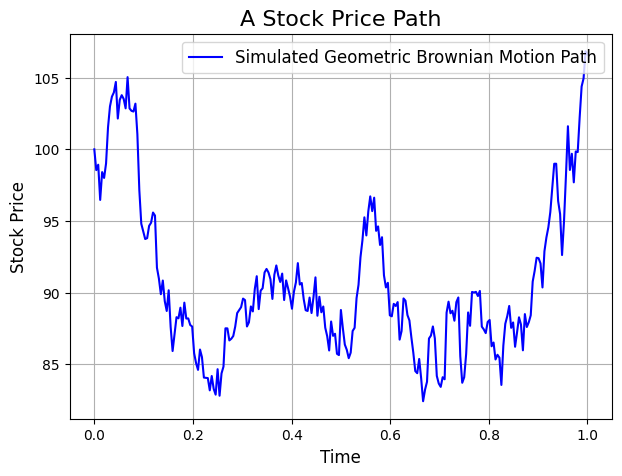

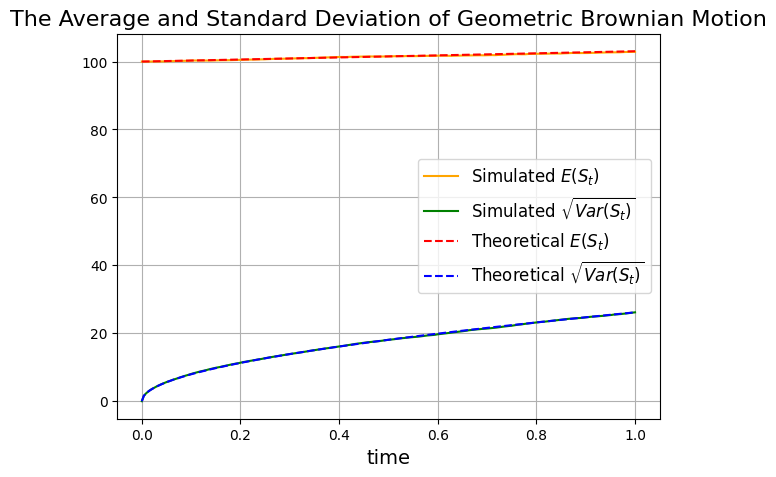

,0,1,2,3,4,5,6,7,8,9,...,243,244,245,246,247,248,249,250,251,252
0,100,98.549514,98.927568,96.469879,98.413849,98.003536,99.016289,101.529441,102.992084,103.677363,...,98.561018,99.691271,97.696962,99.853769,99.807300,102.231115,104.386127,104.951510,106.846246,106.622093
1,100,102.799727,100.575057,99.509497,96.924959,98.119722,98.122437,97.851602,95.219607,97.405363,...,75.903098,75.957215,76.838108,78.525102,78.113471,77.768490,78.399951,81.445828,78.604374,77.420919
2,100,98.204113,100.104571,101.064733,99.688355,99.476646,95.981208,96.571277,97.012560,96.612410,...,123.945547,125.015112,129.124014,134.305672,132.957531,133.879014,134.544749,134.951894,131.900595,130.610475
3,100,99.303404,99.293338,99.822144,97.990496,94.878619,91.863598,91.703898,92.017651,92.778301,...,105.285054,101.883221,104.170984,106.627681,109.061069,106.119982,105.596301,103.836408,105.288883,103.698273
4,100,100.481097,100.795230,100.609935,102.402302,103.401274,101.868693,102.604345,102.904345,100.909135,...,88.919924,88.300608,88.518709,90.741877,91.283179,89.265734,90.312982,87.609824,87.453819,87.632395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,100,101.006789,99.183959,101.968236,103.532249,104.285253,104.490943,104.997622,107.315867,105.221808,...,87.970416,89.053648,88.904512,89.623932,85.509962,84.870412,85.268050,87.217050,89.430146,86.704683
9996,100,98.955957,97.970689,97.180986,98.381798,97.789397,96.767275,96.456810,92.937239,93.407321,...,85.709376,86.550967,85.578288,85.822993,85.128373,85.583994,85.854153,87.316560,91.416444,89.250216
9997,100,98.341746,99.908146,98.591335,99.721731,101.957706,104.388618,104.094308,105.870620,107.883686,...,79.120135,78.271080,78.506137,76.577334,74.975846,77.232884,75.991832,74.497939,73.648368,73.547657
9998,100,101.926226,102.646760,102.612348,101.572857,98.542923,98.200513,98.588436,97.709727,101.523801,...,105.868249,106.584989,107.935826,109.556138,109.252920,108.358088,106.459454,106.210126,106.549404,108.848606


In [4]:
def SGenerate(T,S0,mu,r,sigma):
    N = 252  # BUS
    step = T/N

    paths = []
    for i in range(10000):
        S = S0
        Spath = [S0]
        for j in range(N):
            dw = np.random.normal(0, np.sqrt(step), 1)[0]
            S = S*np.exp((mu-0.5*sigma**2)*step+sigma*dw)
            Spath.append(S)
        paths.append(Spath) 
    
    df = pd.DataFrame(paths)
    mean_row = df.mean()
    std_row = df.std()
    print("E(St)=", mean_row)
    print("SD(St)=", std_row)
    
    t = [i/N for i in range(0, N+1)]
    
    # Plot graph of a Stock price path
    fig = plt.figure(figsize=(7, 5))
    plt.title("A Stock Price Path",fontsize = 16)
    plt.xlabel("Time", fontsize = 12)
    plt.ylabel("Stock Price", fontsize = 12)
    plt.plot(t, paths[0],'b-',label = 'Simulated Geometric Brownian Motion Path')
    plt.legend(loc='upper right', fontsize = 12)
    plt.grid()
    plt.show()

    
    fig = plt.figure(figsize=(7, 5))
    plt.title("The Average and Standard Deviation of Geometric Brownian Motion",fontsize = 16)
    plt.xlabel("time", fontsize = 14)
    l1 = plt.plot(t, mean_row,color='orange',label = 'Simulated $E(S_{t})$')
    l2 = plt.plot(t, std_row,'g-',label = 'Simulated $\sqrt{Var(S_{t})}$')
    TheoE = [S0*np.exp(mu*time) for time in t]
    TheoSD = [np.sqrt(S0**2*np.exp(2*mu*time)*(np.exp(sigma**2*time)-1)) for time in t]
    l3 = plt.plot(t, TheoE,'r',linestyle = '--', label = 'Theoretical $E(S_{t})$')
    l4 = plt.plot(t, TheoSD,'b',linestyle = '--',label = 'Theoretical $\sqrt{Var(S_{t})}$')
    plt.legend(loc='best', fontsize = 12)
    plt.grid()
    plt.show()
    
    return df

SGenerate(1, 100, 0.03, 0.05, 0.25)

In [9]:
def Cbs(t,St,K,r,sigma,T):
    d1t = (np.log(St/K)+(r+sigma**2/2)*(T-t))/(sigma*np.sqrt(T-t))
    d2t = (np.log(St/K)+(r-sigma**2/2)*(T-t))/(sigma*np.sqrt(T-t))
    premium = St*norm.cdf(d1t)-K*np.exp(-r*(T-t))*norm.cdf(d2t)
    return premium

P0 = Cbs(0,100,100,0.05,0.25,1)
print('P0 =', P0)

P0 = 12.335998930368717


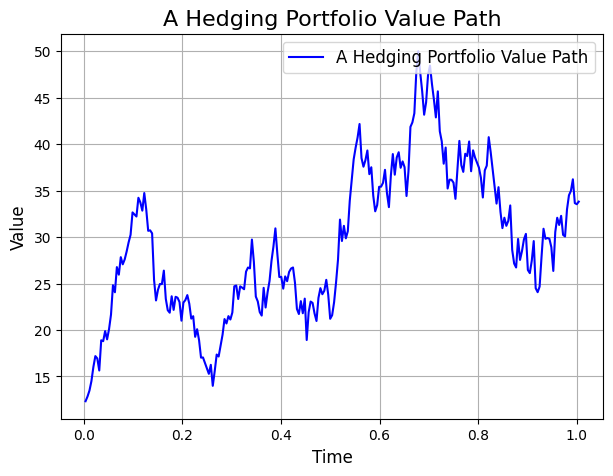

In [11]:
def PGenerate(P0,T,N,S0,K,mu,r,sigma):
    step = T/N
    
    St = S0
    Pt = P0
    Ppath = [P0]
    Cpath = []
    for j in range(N):
        t = j/N
        dWt = np.random.normal(0, np.sqrt(step), 1)[0]
        dSt = mu*St*step+sigma*St*dWt
        d1t = (np.log(St/K)+(r+sigma**2/2)*(T-t))/(sigma*np.sqrt(T-t))
        d2t = (np.log(St/K)+(r-sigma**2/2)*(T-t))/(sigma*np.sqrt(T-t))
        Deltat = norm.cdf(d1t)
        Cbst = St*norm.cdf(d1t)-K*np.exp(-r*(T-t))*norm.cdf(d2t)
        Cpath.append(Cbst)
        dPt = r*Pt*step+Deltat*(dSt-r*St*step)
        Pt += dPt
        St += dSt
        Ppath.append(Pt)
    
    Cpath.append(max(St-K,0))
    error = Ppath[-1]-Cpath[-1]
    return [Ppath,Cpath,error]

times = [(i+1)/252 for i in range(252+1)]
Ppath1 = PGenerate(P0,1,252,100,100,0.03,0.05,0.25)[0]
    
# Plot graph of a Hedging Portfolio value path
fig = plt.figure(figsize=(7, 5))
plt.title("A Hedging Portfolio Value Path",fontsize = 16)
plt.xlabel("Time", fontsize = 12)
plt.ylabel("Value", fontsize = 12)
plt.plot(times,Ppath1,'b-',label = 'A Hedging Portfolio Value Path')
plt.legend(loc='upper right', fontsize = 12)
plt.grid()
plt.show()

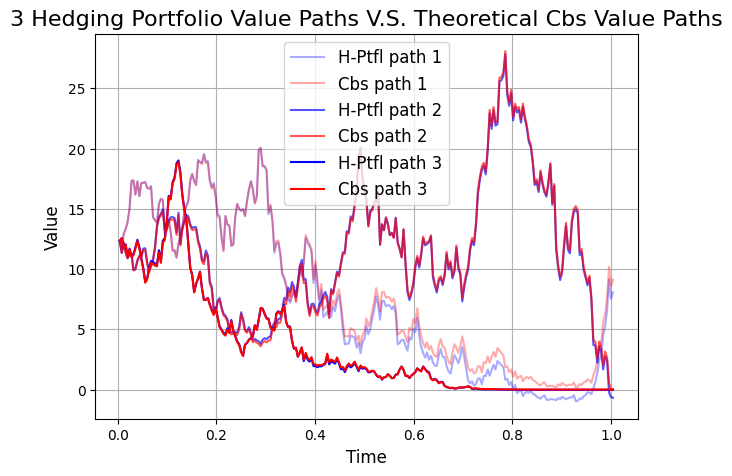

In [12]:
# Plot graph of 3 Hedging Portfolio value paths and 3 corresponding Theoretical Cbs Value Paths
fig = plt.figure(figsize=(7, 5))
plt.title("3 Hedging Portfolio Value Paths V.S. Theoretical Cbs Value Paths",fontsize = 16)
plt.xlabel("Time", fontsize = 12)
plt.ylabel("Value", fontsize = 12)

# Generate 3 sets of paths
#Ppaths = []
#Cpaths = []
for i in range(3):
    a = PGenerate(P0,1,252,100,100,0.03,0.05,0.25)
    #Ppaths.append(a[0])
    #Cpaths.append(a[1])
    plt.plot(times,a[0],'b-', alpha = (i+1)/3, label = 'H-Ptfl path %s' %str(i+1))
    plt.plot(times,a[1],'r-', alpha = (i+1)/3, label = 'Cbs path %s' %str(i+1))

plt.legend(loc='best', fontsize = 12)
plt.grid()
plt.show()

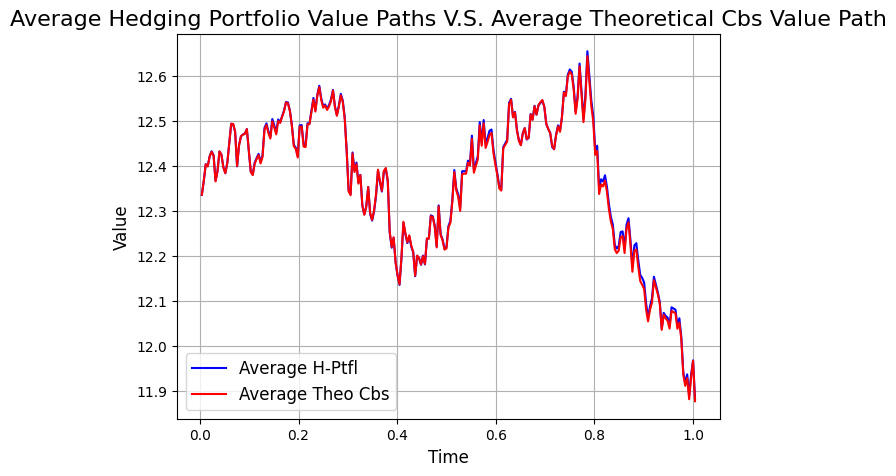

In [13]:
Ppaths = [] # Hedging Portfolio Value Paths
Cpaths = [] # Theoretical Cbs Value Paths
Epaths = [] # Hedging Errors 
for i in range(1000):
    a = PGenerate(P0,1,252,100,100,0.03,0.05,0.25)
    Ppaths.append(a[0]) 
    Cpaths.append(a[1])
    Epaths.append(a[-1])
dfP = pd.DataFrame(Ppaths)
dfC = pd.DataFrame(Cpaths)
mean_Ppaths = dfP.mean()
mean_Cpaths = dfC.mean()
#std_row = df.std()
#print("E(Wt)=", mean_row)
#print("SD(Wt)=", std_row)

# Plot graph of average Hedging Portfolio value paths and average Theoretical Cbs Value Paths
fig = plt.figure(figsize=(7, 5))
plt.title("Average Hedging Portfolio Value Paths V.S. Average Theoretical Cbs Value Path",fontsize = 16)
plt.xlabel("Time", fontsize = 12)
plt.ylabel("Value", fontsize = 12)
plt.plot(times,mean_Ppaths,'b-',label = 'Average H-Ptfl')
plt.plot(times,mean_Cpaths,'r-',label = 'Average Theo Cbs')
plt.legend(loc='best', fontsize = 12)
plt.grid()
plt.show()

Error Daily: mean =  0.005030180081123431 standard deviation =  0.5728212139987661


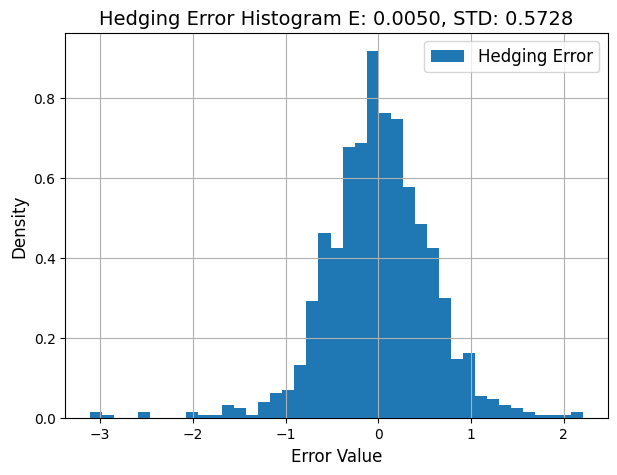

In [14]:
# Daily
d_mean = np.mean(Epaths)
d_std = np.std(Epaths)
print("Error Daily: mean = ", d_mean, 'standard deviation = ', d_std)

# Plot histogram of Hedging Error
fig = plt.figure(figsize=(7, 5))
plt.title("Hedging Error Histogram E: {:.4f}, STD: {:.4f}".format(d_mean, d_std),fontsize = 14)
plt.xlabel("Error Value", fontsize = 12)
plt.ylabel("Density", fontsize = 12)
plt.hist(Epaths, density=True, bins='auto', histtype='stepfilled', alpha=1, label = "Hedging Error")
plt.legend(loc='best', fontsize = 12)
plt.grid()
plt.show()

In [15]:
# Weekly
w_Epaths = [] # Hedging Errors
for i in range(1000):
    a = PGenerate(P0,1,52,100,100,0.03,0.05,0.25)
    w_Epaths.append(a[-1])

# Biweekly
b_Epaths = [] # Hedging Errors
for i in range(1000):
    a = PGenerate(P0,1,26,100,100,0.03,0.05,0.25)
    b_Epaths.append(a[-1])

In [16]:
# Weekly
w_mean = np.mean(w_Epaths)
w_std = np.std(w_Epaths)
print("Error Weekly: mean = ", w_mean, 'standard deviation = ', w_std)

# Biweekly
b_mean = np.mean(b_Epaths)
b_std = np.std(b_Epaths)
print("Error Biweekly: mean = ", b_mean, 'standard deviation = ', b_std)

Error Weekly: mean =  0.006919989997110804 standard deviation =  1.2092370213468957
Error Biweekly: mean =  0.04919960430335988 standard deviation =  1.6915189423472423


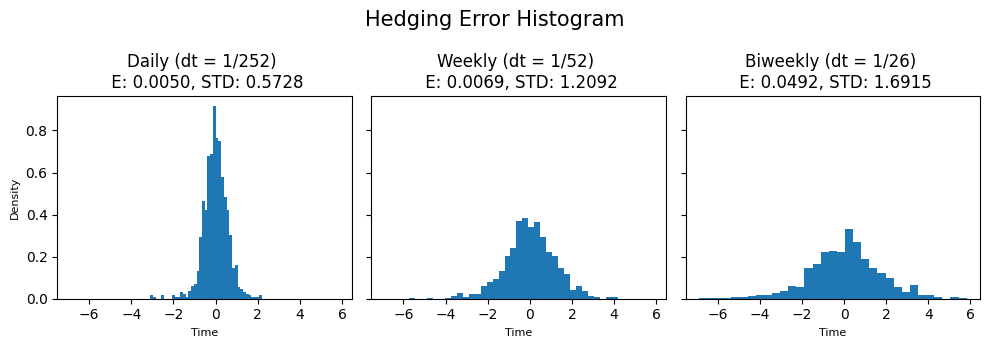

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5), sharex=True, sharey=True)
fig.suptitle('Hedging Error Histogram', fontsize=15)

# Daily
ax = axes[0]
ax.set_title("Daily (dt = 1/252) \n E: {:.4f}, STD: {:.4f}".format(d_mean, d_std))
ax.set_xlabel("Time", fontsize = 8)
ax.set_ylabel("Density", fontsize = 8)
ax.hist(Epaths, density=True, bins='auto', histtype='stepfilled', alpha=1)

# Weekly
ax = axes[1]
ax.set_title("Weekly (dt = 1/52) \n E: {:.4f}, STD: {:.4f}".format(w_mean, w_std))
ax.set_xlabel("Time", fontsize = 8)
ax.hist(w_Epaths, density=True, bins='auto', histtype='stepfilled', alpha=1)

# Biweekly
ax = axes[2]
ax.set_title("Biweekly (dt = 1/26) \n E: {:.4f}, STD: {:.4f}".format(b_mean, b_std))
ax.set_xlabel("Time", fontsize = 8)
ax.hist(b_Epaths, density=True, bins='auto', histtype='stepfilled', alpha=1)

plt.tight_layout()
plt.show()

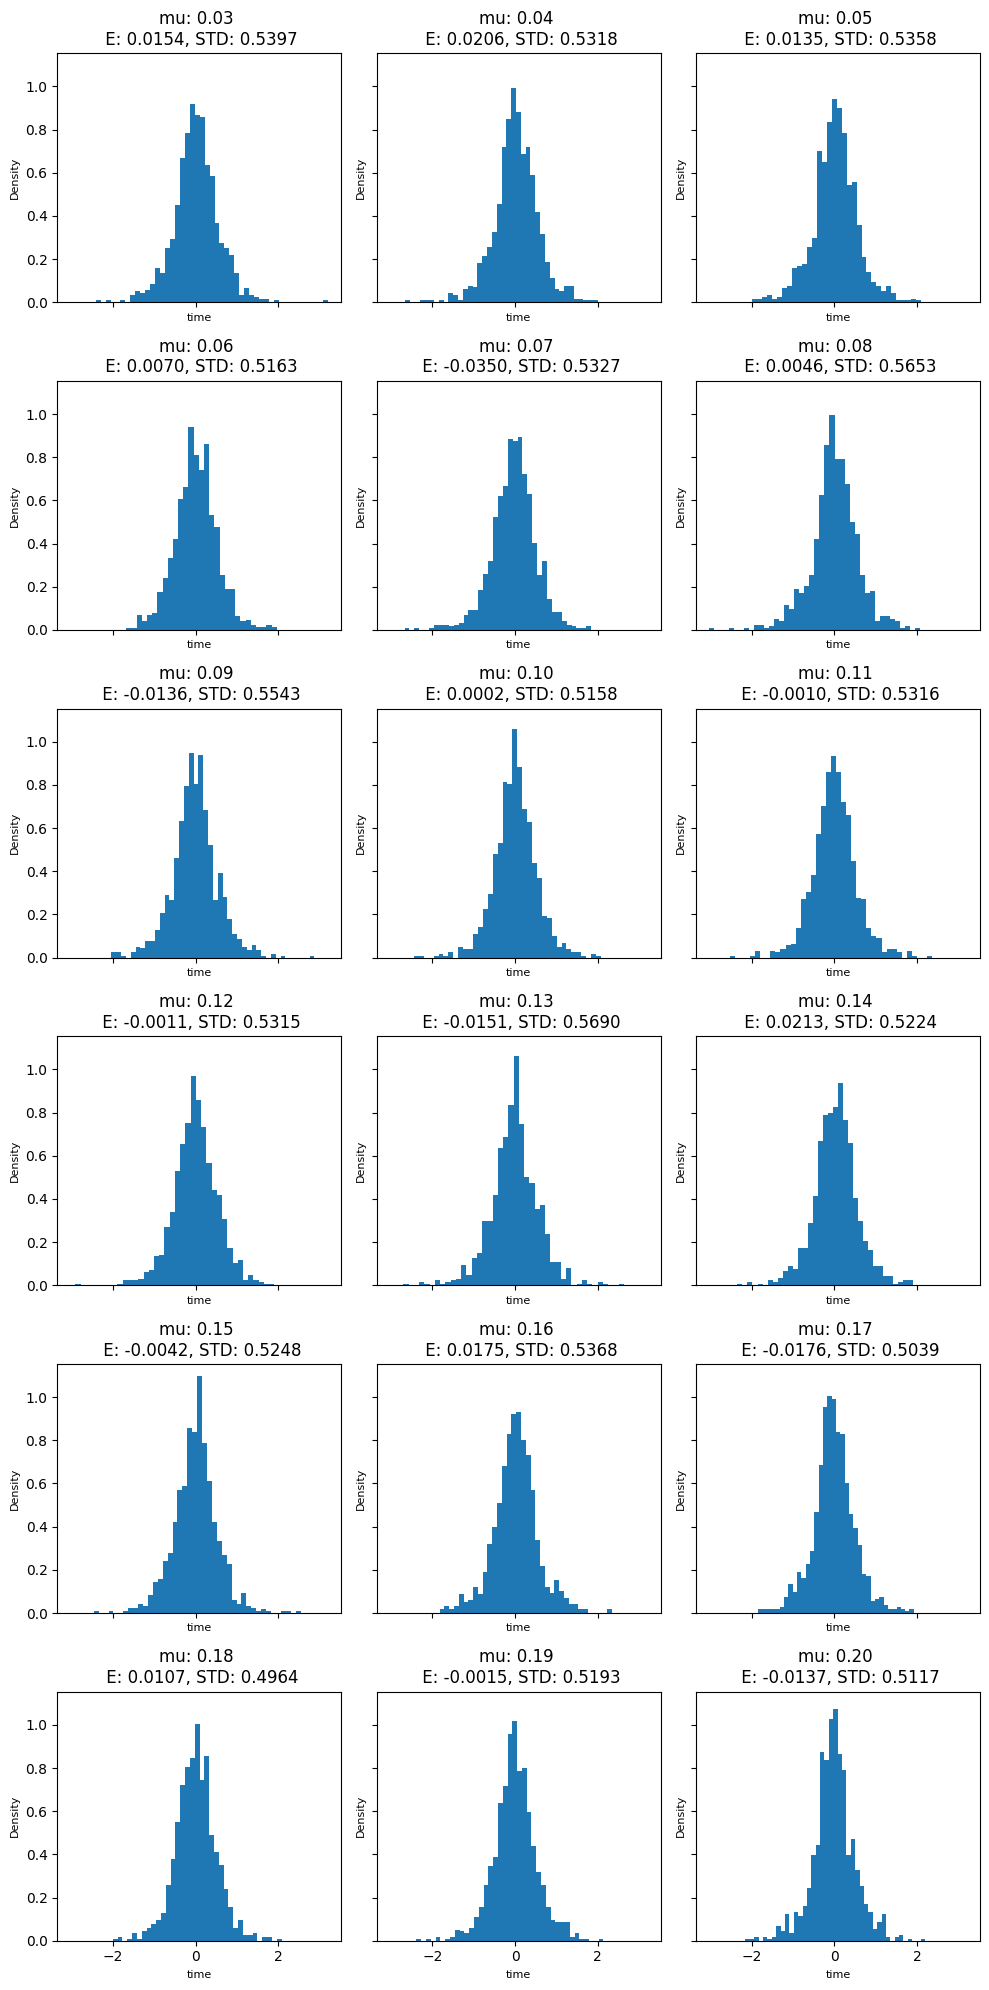

In [18]:
%matplotlib inline
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(10, 20), sharex=True, sharey=True)
#fig.suptitle('Hedging Error Histogram', fontsize=15)
#plt.subplots_adjust(top=0.8)

for j in range(18):
    mu = (3+j)/100
    Epaths = []
    for i in range(1000):
        a = PGenerate(P0,1,252,100,100,mu,0.05,0.25)
        Epaths.append(a[-1])
    d_mean = np.mean(Epaths)
    d_std = np.std(Epaths)
    ax = axes[j//3,j%3]
    ax.set_title("mu: {:.2f} \n E: {:.4f}, STD: {:.4f}".format(mu, d_mean, d_std))
    ax.set_xlabel("time", fontsize = 8)
    ax.set_ylabel("Density", fontsize = 8)
    ax.hist(Epaths, density=True, bins='auto', histtype='stepfilled', alpha=1)

plt.tight_layout()
plt.show()

In [ ]:
%matplotlib inline
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 14), sharex=True, sharey=True)
#fig.suptitle('Hedging Error Histogram', fontsize=15)
#plt.subplots_adjust(top=0.8)

for j in range(12):
    sigma = (25+j*5)/100
    Epaths = []
    for i in range(1000):
        P0 = Cbs(0,100,100,0.05,sigma,1) 
        a = PGenerate(P0,1,252,100,100,0.03,0.05,sigma)
        Epaths.append(a[-1])
    d_mean = np.mean(Epaths)
    d_std = np.std(Epaths)
    ax = axes[j//3,j%3]
    ax.set_title("sigma: {:.2f} \n E: {:.4f}, STD: {:.4f}".format(sigma, d_mean, d_std))
    ax.set_xlabel("time", fontsize = 8)
    ax.set_ylabel("Density", fontsize = 8)
    ax.hist(Epaths, density=True, bins='auto', histtype='stepfilled', alpha=1)

plt.tight_layout()
plt.show()

Conclusions:
1. 
 increases (daily 1/252 -> weekly 1/52 -> biweekly 1/26).

As 
 increases from 1/252, to 1/52, finally to 1/26,

: no obvious rule.

: increases. This is because as 
 increases, there are less opportunities for the hedging portfolio to rebalance to fully offset the effect of the call option. So, every simulation is different to a larger extent. Therefore, there is a higher standard deviation in the hedging error.

2. 
 increases (from 0.03 to 0.20, i.e. in 0.01*range(3,21)).

As 
 increases from 0.03 to 0.20, i.e. in 0.01*range(3,21),

: almost no change. This is because 
 represents the expected return of underlying stock, but does not get involved in the Black-Scholes Model. Therefore, it has almost no impact on the call option and hedging portfolio.

: almost no change. Same reason as above.

3. 
 increases from 0.25 to 0.80, i.e. in 0.01(25+5range(12)).

As 
 increases from 0.25 to 0.80, i.e. in 0.01(25+5range(12)),

:almost no change.

: increases. This is because 
 represents the volatility of underlying stock. Larger volatility means larger uncertainty, therefore larger extent of differences between the values of the hedging portfolio and the call option.

In [ ]:
def lnSGenerate(T,N,S0,mu,r,sigma,path_num):
    step = T/N
    
    n = [i for i in range(1, N+1)]
    
    # Set the environment of plotting historical volatility graph
    fig = plt.figure(figsize=(7, 5))
    plt.title("Historical Volatility Path Graph",fontsize = 16)
    plt.xlabel("n", fontsize = 12)
    plt.ylabel("Historical Volatility", fontsize = 12)
    
    for num in range(path_num):
        
        # Simulate the S and ln(S) paths
        S = S0
        lnS = np.log(S0)
        lnSpath = [lnS]
        for j in range(N):
            dw = np.random.normal(0, np.sqrt(step), 1)[0]
            S = S*np.exp((mu-0.5*sigma**2)*step+sigma*dw)
            lnS = np.log(S)
            # Method2: calculate lnS directly
            '''
            dlnS = (mu-sigma**2/2)step+sigma*dw
            lnS += dlnS
            '''
            lnSpath.append(lnS)

        # Calculate the historical volatility arrays
        lnS_diff = np.diff(lnSpath)
        lnS_diff_square = lnS_diff**2 
        lnS_diff_square_partsum = np.cumsum(lnS_diff_square)
        his_vol = [252/i*lnS_diff_square_partsum[i-1] for i in range(1,len(lnS_diff_square_partsum)+1)]
        #dfvol = pd.DataFrame(his_vol)
        
        # Plot this historical volatility paths
        print("Path %s:" %str(num+1), "Final his vol = ", his_vol[-1], "; Final std = ", np.sqrt(his_vol[-1]))
        plt.plot(n, his_vol,'b-', alpha = (num)/6+0.15, label = "His Vol Path %s" %str(num+1))
    
    plt.legend(loc='best', fontsize = 12)
    plt.grid()
    plt.show()
    #return dfvol

lnSGenerate(1,252,100,0.03,0.05,0.25,5)

In [ ]:
import random

def BE(x):
    # x means sigma
    T = 1
    N = 252
    S0 = 100
    K = 100
    mu = 0.03
    r = 0.05
    step = T/N
    
    P0 = Cbs(0,S0,K,r,x,T)
    Pt = P0
    Ppath = [P0]
    
    #random.seed(42)
    
    for j in range(N):
        t = j/N
        d1t = (np.log(Spath[j]/K)+(r+x**2/2)*(T-t))/(x*np.sqrt(T-t))
        #d2t = (np.log(Spath[j]/K)+(r-x**2/2)*(T-t))/(x*np.sqrt(T-t))
        Deltat = norm.cdf(d1t)
        dPt = r*Pt*step+Deltat*(Spath[j+1]-Spath[j]-r*Spath[j]*step)
        Pt += dPt
        Ppath.append(Pt)
    
    hedging_error = Ppath[-1]-max(Spath[-1]-K,0)
    
    return hedging_error

from scipy.optimize import root

# generate a given S path
T = 1
N = 252
S0 = 100
K = 100
mu = 0.03
r = 0.05
step = T/N
sigma_for_S = 0.25

sigma_BE = []

for i in range(10000):
    S = S0
    Spath = [S0]
    for j in range(N):
        dw = np.random.normal(0, np.sqrt(step), 1)[0]
        S = S*np.exp((mu-0.5*sigma_for_S**2)*step+sigma_for_S*dw)
        Spath.append(S)

# Plot histogram of BE sigma
fig = plt.figure(figsize=(7, 5))
plt.title("BE sigma Histogram",fontsize = 14)
plt.xlabel("BE sigma", fontsize = 12)
plt.ylabel("Density", fontsize = 12)
plt.hist(sigma_BE, density=True, bins='auto', histtype='stepfilled', alpha=1, label = "BE sigma")
plt.legend(loc='best', fontsize = 12)
plt.grid()
plt.show()

In [ ]:
import statsmodels.api as sm

# Create a Q-Q plot
sm.qqplot(np.array(sigma_BE), line='45', fit=True)
plt.title('Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [ ]:
print("The mean of B/E volatility is", np.mean(sigma_BE))